### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Read 'python logo.jpg' & 'opencv.png'

In [2]:
img1 = cv2.imread('python logo.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('opencv.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

### View both the images

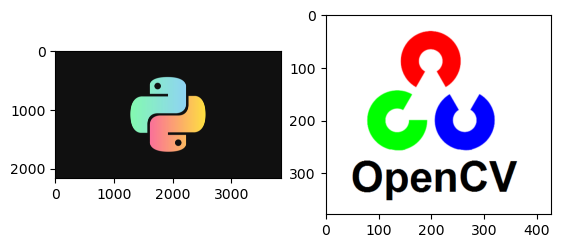

In [3]:
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

### Print the shape of both the images

In [4]:
print(f"Shape of Image 1 is {img1.shape}")
print(f"Shape of Image 2 is {img2.shape}")

Shape of Image 1 is (2160, 3840, 3)
Shape of Image 2 is (378, 428, 3)


### Set x and y offset to set the part where you want to paste the image

In [5]:
x_offset = 3840 - 428
y_offset = 2160 - 378

### Set the region of interest

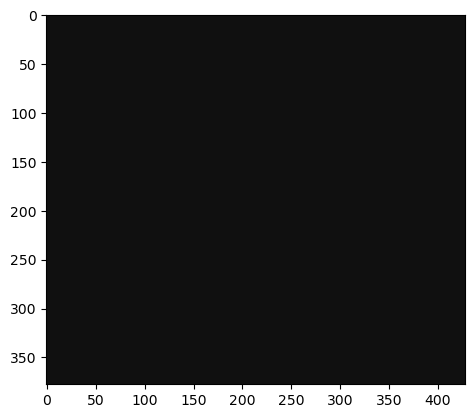

In [6]:
roi = img1[y_offset:2160, x_offset:3840]
plt.imshow(roi)
plt.show()

### Convert the smaller image into grayscale

In [7]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

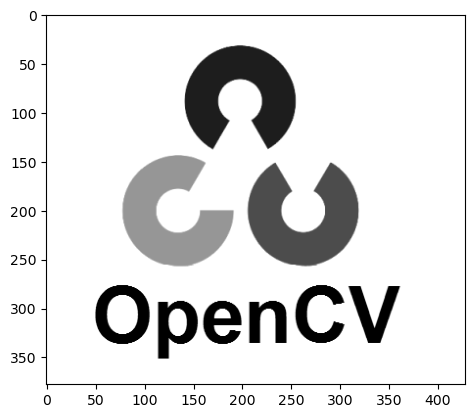

In [8]:
plt.imshow(img2gray, cmap = 'gray')
plt.show()

### Notice that letters in the image are not exactly colored in black but rather in some dark grey color. That is why we need to apply a thresholding in order to create a binary image.

In [9]:
ret, mask = cv2.threshold(img2gray, 150, 255, cv2.THRESH_BINARY)

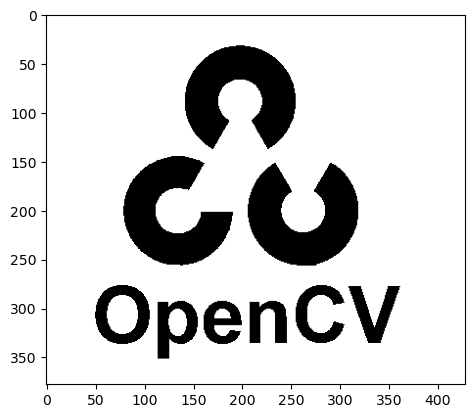

In [10]:
plt.imshow(mask, cmap = 'gray')

### Fetch the inverse of the image using 'bitwise_or'

Essentially just convert all black parts of the image to white and white parts to black

In [11]:
mask_inv = cv2.bitwise_not(mask)

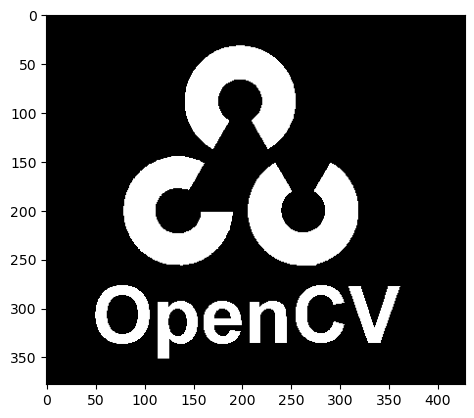

In [12]:
plt.imshow(mask_inv, cmap = 'gray')

### Paste the inverse mask on top of original image

In [13]:
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)

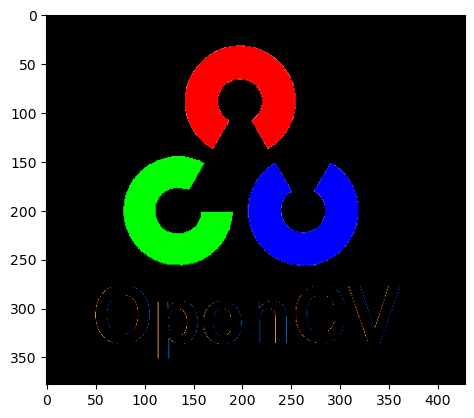

In [14]:
plt.imshow(fg)

### Paste the mask on top of our region of interest

In [15]:
bg = cv2.bitwise_or(roi, roi, mask = mask)

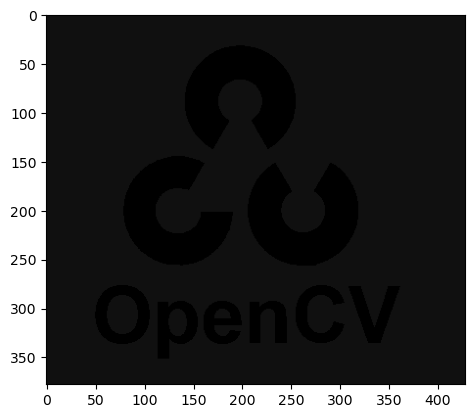

In [16]:
plt.imshow(bg)

### Add our foreground & background image

In [17]:
final_roi = cv2.add(fg, bg)

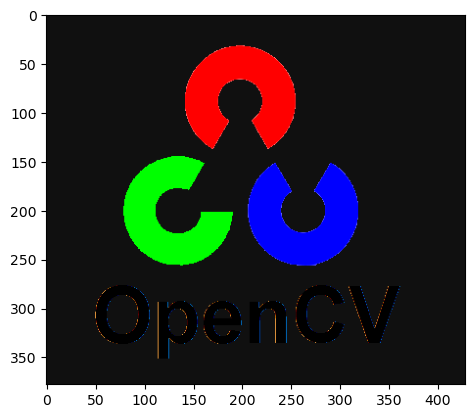

In [18]:
plt.imshow(final_roi)

### Paste the final roi on top of our original Image

In [19]:
img1[y_offset:2160, x_offset:3840] = final_roi

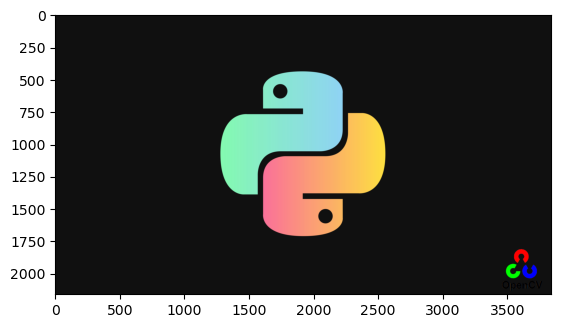

In [20]:
plt.imshow(img1)

***